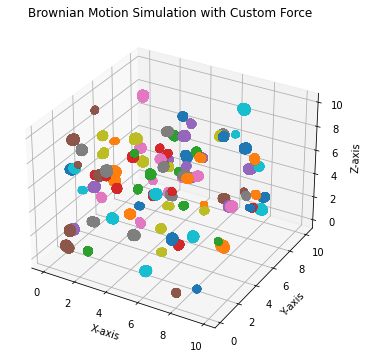

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simtk import openmm
from simtk.openmm import app, LangevinIntegrator, CustomExternalForce, Context

# Define parameters
num_particles = 100
box_size = 10.0
temperature = 300.0  # Temperature for Langevin dynamics
time_step = 0.001  # Time step for simulation

# Create a System and define particles with random positions and radii
system = openmm.System()
for _ in range(num_particles):
    system.addParticle(1.0)  # Mass of the particles

# Set up positions and radii for the particles
positions = np.random.rand(num_particles, 3) * box_size
radii = np.random.uniform(low=0.2, high=1.0, size=num_particles)

# Create a Langevin integrator for Brownian dynamics
integrator = LangevinIntegrator(temperature, 1.0 / time_step, time_step)

# Set up a custom force (e.g., simple harmonic potential)
custom_force = 'k * (r - r0)^2;'  # Custom force expression for a harmonic potential
custom_force += 'r = sqrt(x^2 + y^2 + z^2);'  # Calculate distance from the origin
custom_force += 'r0 = 2.0;'  # Equilibrium distance for the harmonic potential
custom_force += 'k = 10.0;'  # Spring constant for the harmonic potential

# Add the custom force to the system
system.addForce(CustomExternalForce(custom_force))

# Create a context and set particle positions
platform = openmm.Platform.getPlatformByName('CPU')  # Change to 'CUDA' if using GPU
context = Context(system, integrator, platform)
context.setPositions(positions)

# Run the simulation steps
num_steps = 1000
trajectory = []
for _ in range(num_steps):
    state = context.getState(getPositions=True)
    positions = state.getPositions(asNumpy=True)
    trajectory.append(positions)
    context.getIntegrator().step(1)

# Visualize the trajectory using Matplotlib
trajectory = np.array(trajectory)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Plot particles with radii as scatter points
for i in range(num_particles):
    ax.scatter(trajectory[:, i, 0], trajectory[:, i, 1], trajectory[:, i, 2], s=100*radii[i], alpha=0.6)

plt.title('Brownian Motion Simulation with Custom Force')
plt.show()

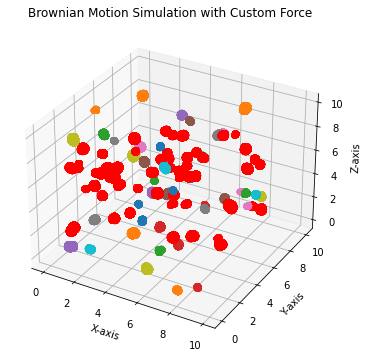

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from simtk import openmm
from simtk.openmm import app, LangevinIntegrator, CustomExternalForce, Context

# ... (existing code remains the same)

# Run the simulation steps
num_steps = 1000
trajectory = []
contact_pairs = []  # List to store pairs of particles that come into contact

for _ in range(num_steps):
    state = context.getState(getPositions=True)
    positions = state.getPositions(asNumpy=True)
    trajectory.append(positions)
    
    # Check for particle contacts
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            distance = np.linalg.norm(positions[i] - positions[j])
            if distance < radii[i] + radii[j]:
                contact_pairs.append((i, j))  # Store the indices of contacting particles
    
    context.getIntegrator().step(1)

# Group particles that come into contact
contacting_particles = set()
for pair in contact_pairs:
    contacting_particles.update(pair)

contacting_particles = list(contacting_particles)

# Visualize the trajectory using Matplotlib
trajectory = np.array(trajectory)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Plot particles with radii as scatter points
for i in range(num_particles):
    if i in contacting_particles:
        ax.scatter(trajectory[:, i, 0], trajectory[:, i, 1], trajectory[:, i, 2], s=100*radii[i], color='red', alpha=0.6)
    else:
        ax.scatter(trajectory[:, i, 0], trajectory[:, i, 1], trajectory[:, i, 2], s=100*radii[i], alpha=0.6)

plt.title('Brownian Motion Simulation with Custom Force')
plt.show()

Exception: This Integrator is already bound to a context